In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\PID\PID_AG_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,NaN,29.0,NaN,NaN,0.351,NaN
2,8.0,NaN,64.0,0.0,NaN,NaN,0.672,NaN
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,NaN,40.0,35.0,NaN,NaN,2.288,NaN
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	76
float64		column 2	95
float64		column 3	38
float64		column 4	38
float64		column 5	133
float64		column 6	133
float64		column 7	0
float64		column 8	95


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
count,692.000000,673.000000,730.000000,730.000000,635.000000,635.000000,768.000000,673.000000
mean,3.809249,120.552749,69.489041,20.434247,78.771654,32.091181,0.471876,33.329866
std,3.416318,31.082656,18.945174,15.961517,114.669253,7.856600,0.331329,11.937135
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.450000,0.243750,24.000000
50%,3.000000,116.000000,72.000000,23.000000,32.000000,32.400000,0.372500,29.000000
75%,6.000000,139.000000,80.000000,32.000000,125.000000,36.500000,0.626250,41.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


<AxesSubplot:>

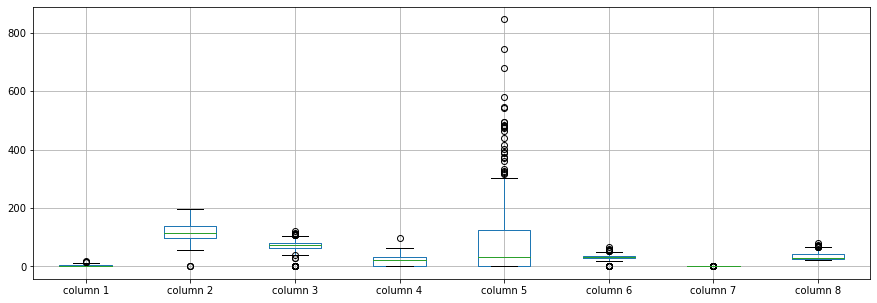

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      3.809249
column 2    120.552749
column 3     69.489041
column 4     20.434247
column 5     78.771654
column 6     32.091181
column 7      0.471876
column 8     33.329866
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
column 1,1.000000,0.143689,0.126084,-0.080075,-0.086938,0.005313,-0.027438,0.532248
column 2,0.143689,1.000000,0.142427,0.063235,0.326764,0.217525,0.121459,0.284074
column 3,0.126084,0.142427,1.000000,0.200716,0.084022,0.260520,0.023537,0.232896
column 4,-0.080075,0.063235,0.200716,1.000000,0.426267,0.374703,0.196988,-0.128781
column 5,-0.086938,0.326764,0.084022,0.426267,1.000000,0.185073,0.196625,-0.064689
column 6,0.005313,0.217525,0.260520,0.374703,0.185073,1.000000,0.119699,0.010221
column 7,-0.027438,0.121459,0.023537,0.196988,0.196625,0.119699,1.000000,0.037282
column 8,0.532248,0.284074,0.232896,-0.128781,-0.064689,0.010221,0.037282,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [8,8+10,8+10+10,8+10+10+10,8+10+10+10+10,8+10+10+10+10+10,8+10+10+10+10,8+10+10+10,8+10+10,8+10,8], vae_layer = False, seed = 10)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [8]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 372.1487636566162
Epoch: 1 , loss: 370.48408063252765
Epoch: 2 , loss: 372.92833518981934
Epoch: 3 , loss: 373.03735733032227
Epoch: 4 , loss: 372.43592325846356
Epoch: 5 , loss: 371.90001169840497
Epoch: 6 , loss: 371.30793444315594
Epoch: 7 , loss: 370.22244199117023
Epoch: 8 , loss: 371.4852485656738
Epoch: 9 , loss: 371.4236240386963
Epoch: 10 , loss: 369.1348171234131
Epoch: 11 , loss: 370.4200897216797
Epoch: 12 , loss: 366.66934140523273
Epoch: 13 , loss: 361.84794362386066
Epoch: 14 , loss: 351.60726102193195
Epoch: 15 , loss: 334.1059401830037
Epoch: 16 , loss: 325.1040096282959
Epoch: 17 , loss: 320.38583246866864
Epoch: 18 , loss: 318.2751178741455
Epoch: 19 , loss: 316.858185450236
Epoch: 20 , loss: 316.93898646036786
Epoch: 21 , loss: 311.7599353790283
Epoch: 22 , loss: 313.9768231709798
Epoch: 23 , loss: 310.4975347518921
Epoch: 24 , loss: 314.3872820536296
Epoch: 25 , loss: 308.7735513051

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(768, 8)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     8.000
column 2    99.000
column 3    84.000
column 4     0.000
column 5     0.000
column 6    35.400
column 7     0.388
column 8    50.000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\PID.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
1,0.0,0.000000,-65.884209,0.0,0.112027,-26.484210,0.0,-30.883007
2,0.0,-182.900162,0.000000,0.0,0.097954,-23.199269,0.0,-31.898547
3,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
4,0.0,-136.890598,0.000000,0.0,-167.892508,-42.989217,0.0,-32.887916
...,...,...,...,...,...,...,...,...
763,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
764,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
765,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
766,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(2195.979638037369, 5776.576248839705)

In [17]:
NRMS=numerator/denominator
NRMS


0.3801524542290008

In [18]:
new_df.iloc[66,:]

column 1      0.000
column 2    109.000
column 3     88.000
column 4     30.000
column 5      0.000
column 6     32.500
column 7      0.855
column 8     38.000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6.0,148.000000,72.000000,35.0,0.000000,33.600000,0.627,50.000000
1,1.0,85.000000,0.115791,29.0,0.112027,0.115790,0.351,0.116993
2,8.0,0.099838,64.000000,0.0,0.097954,0.100731,0.672,0.101453
3,1.0,89.000000,66.000000,23.0,94.000000,28.100000,0.167,21.000000
4,0.0,0.109402,40.000000,35.0,0.107492,0.110783,2.288,0.112084
...,...,...,...,...,...,...,...,...
763,10.0,101.000000,76.000000,48.0,180.000000,32.900000,0.171,63.000000
764,2.0,122.000000,70.000000,27.0,0.000000,36.800000,0.340,27.000000
765,5.0,121.000000,72.000000,23.0,112.000000,26.200000,0.245,30.000000
766,1.0,126.000000,60.000000,0.0,0.000000,30.100000,0.349,47.000000


In [20]:
imputations[-1].to_excel("PID_AG_10.xlsx", index=False, header=False)